Codes may seem a bit messy, but due to the fact that we have very little time to finish 3 projects with the same deadline, we did not make it as clear as it could be.

In [1]:
# all libraries are here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import joblib
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Reading only Altun's file and working on language and sentiments

In [55]:
data = pd.read_excel("processed_Altun.xlsx", encoding='utf-8')

In [56]:
data.head()

,Full Text,Clean Text,Cost,Sentiment,Main Language,User DTO,User Name,User Location,Language,Hashtags,Tweet Local Creation Date,Created At
0,@nemosh_m Dua Lipa Bakini unutdu bizimkiler on...,Dua Lipa Bakini unutdu bizimkiler onun videol...,NaN,mn,A,EFidaska,Asadzade 💎,azerbaijan/baku,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:16:47
1,Adam bir nəfəri stalklıyar),Adam bir nəfəri stalklıyar),NaN,mn,a,Gicbesername,Gicbəsər 💥💣,Bakı,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:21:05
2,məni stalklıyan yoxdu,məni stalklıyan yoxdu,NaN,n,a,Gicbesername,Gicbəsər 💥💣,Bakı,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:22:49
3,RT @Gicbesername: nəysə yatıram sabah çoxlu me...,nəysə yatıram sabah çoxlu mesaj gələcəy,NaN,n,a,Gicbesername,Gicbəsər 💥💣,Bakı,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:23:36
4,@qubiyevaego_GS Mən də dərdimi sənə danışım. D...,Mən də dərdimi sənə danışım. Dinləyərsən?Mənd...,NaN,ms,a,Parvizisa,Parvizisa,Baku,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:50:03


In [62]:
text = data['Full Text']
sentiment = data['Sentiment']
language = data['Language.1']

In [63]:
new_data = {'Full Text':text, 'Sentiment': sentiment, 'Language.1': language}

In [64]:
new_data=pd.DataFrame(data=new_data)

In [65]:
new_data.head()

,Text,Sentiment,Language
0,Dua Lipa Bakini unutdu bizimkiler onun videol...,mn,A
1,Adam bir nəfəri stalklıyar),mn,a
2,məni stalklıyan yoxdu,n,a
3,nəysə yatıram sabah çoxlu mesaj gələcəy,n,a
4,Mən də dərdimi sənə danışım. Dinləyərsən?Mənd...,ms,a


In [67]:
x = new_data['Text']
y = new_data['Language']

In [68]:
x_train_lan = x.iloc[:4999]
x_test_lan = x.iloc[4999:]
y_train_lan = y.iloc[:4999]
y_test_lan = y.iloc[4999:]

## Predicting labels of language

In [213]:
x_test_lan[9999]

'@Hz_Nicat Nicat səni ilmə ilmə eliyərəm,üstünnən tanknan keçib ətinnən dolma bişirib sümüklərinnən xaş eliyərəm əsəblərimnən oynama'

In [8]:
cv = CountVectorizer()

In [9]:
train_cv = cv.fit_transform(x_train_lan)

In [10]:
test_cv = cv.transform(x_test_lan)

In [243]:
train_cv.shape

(4999, 18060)

In [244]:
test_cv.shape

(5001, 18060)

In [323]:
y_train_lan.shape

(1861,)

In [11]:
from sklearn.svm import SVC

svc_lan = SVC(kernel = 'linear', gamma='auto', random_state = 1)
svc_lan.fit(train_cv, y_train_lan)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
pred_lan = svc_lan.predict(test_cv)

In [248]:
pred_lan

array(['az', 't', 'az', ..., 'az', 't', 'az'], dtype=object)

In [13]:
new_data['Language.1'].iloc[4999:] = pred_lan

In [250]:
new_data['Language.1']

0        t
1        t
2        t
3        t
4       az
        ..
9995    az
9996    az
9997    az
9998     t
9999    az
Name: Language.1, Length: 10000, dtype: object

In [315]:
(new_data['Language.1'].iloc[0] == 'az')

Full Text     False
Sentiment     False
Language.1    False
Name: 0, dtype: bool

## Accuracy of first 5000 rows - language

In [232]:
x_train_5000, x_test_5000, y_train_5000, y_test_5000 = train_test_split(train_cv, y_train_lan, test_size=0.2, random_state=1)

In [234]:
svc_5000 = SVC(kernel = 'linear', gamma='auto', random_state = 1)
svc_5000.fit(x_train_5000, y_train_5000)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [238]:
pred_5000 = svc_5000.predict(x_test_5000)

In [239]:
print(classification_report(y_test_5000, pred_5000))

              precision    recall  f1-score   support

          az       0.90      0.97      0.93       678
          en       0.00      0.00      0.00         4
           t       0.92      0.79      0.85       318

    accuracy                           0.91      1000
   macro avg       0.61      0.59      0.59      1000
weighted avg       0.91      0.91      0.90      1000



## Sentiment Prediction

In [14]:
x = new_data['Full Text']
y_s = new_data['Sentiment']

In [15]:
x_train_sen = x.iloc[:4999]
x_test_sen = x.iloc[4999:]
y_train_sen = y_s.iloc[:4999]
y_test_sen = y_s.iloc[4999:]

In [16]:
cv_f = CountVectorizer()
train_cv_sen = cv_f.fit_transform(x_train_sen)
test_cv_sen = cv_f.transform(x_test_sen)

In [17]:


svc_sen = SVC(kernel = 'linear', gamma='auto', random_state = 1)
svc_sen.fit(train_cv_sen, y_train_sen)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
pred_sen = svc_sen.predict(test_cv_sen)

In [22]:
pred_sen


array(['ne', 'ne', 'mu', ..., 'ne', 'mu', 'ne'], dtype=object)

In [19]:
new_data['Sentiment'].iloc[4999:] = pred_sen

In [24]:
new_data['Sentiment']

0       ne
1       mu
2       ne
3       ne
4       ne
        ..
9995    mu
9996    ne
9997    ne
9998    mu
9999    ne
Name: Sentiment, Length: 10000, dtype: object

In [22]:
new_data.Sentiment.unique()

array(['ne', 'mu', 'menfi'], dtype=object)

## Accuracy Sentiment


In [23]:
cv_f2 = CountVectorizer()
train_cv_sentt = cv_f2.fit_transform(x)
test_cv_sentt = cv_f2.transform(y_s)

In [182]:
x_train_sent, x_test_sent, y_train_sent, y_test_sent = train_test_split(train_cv_sentt, y_s, test_size=0.3, random_state=1)

In [183]:
svc_sent = SVC()
svc_sent.fit(x_train_sent, y_train_sent)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
pred_sent = svc_sent.predict(x_test_sent)

In [185]:
print(classification_report(y_test_sent, pred_sent))

              precision    recall  f1-score   support

       menfi       0.74      0.04      0.08       339
          mu       0.82      0.27      0.41       494
          ne       0.76      0.99      0.86      2167

    accuracy                           0.76      3000
   macro avg       0.77      0.43      0.45      3000
weighted avg       0.77      0.76      0.70      3000



## Separating turkish and azerbaijan

In [25]:
new_data_aze =[]

In [26]:
for index, row in new_data.iterrows(): 
    text = new_data.iloc[index]
    if (new_data['Language.1'][index] == 'az'):
        new_data_aze.append(text)


In [27]:
new_data_aze = pd.DataFrame(data=new_data_aze)

In [28]:
new_data_aze = new_data_aze.reset_index(drop=True)

In [29]:
new_data_aze = new_data_aze.drop(columns=['Language.1'])

In [30]:
new_data_aze.to_csv('altun_filtered.csv', encoding = 'utf8')

In [31]:
new_data_aze.head()

,Full Text,Sentiment
0,@gunnersamir11 @HandofHenry Yo biz qoymuşuğğ b...,ne
1,Leo Messi'nin mükəmməl cərimə zərbəsinin Camp ...,ne
2,@HandofHenry @gunnersamir11 babat soxariq burd...,ne
3,Qardaşımın məktəbdə yaşadığı 1 günü mənim 1 sm...,mu
4,@EFidaska Axirincini gozel dedin),mu


## change values of sentiment

## Testing accuracy of Azeri

In [127]:
data_f = pd.read_csv("altun_filtered.csv", encoding='utf8')

In [63]:
data_f.head()

,Unnamed: 0,Full Text,Sentiment
0,0,@gunnersamir11 @HandofHenry Yo biz qoymuşuğğ b...,ne
1,1,Leo Messi'nin mükəmməl cərimə zərbəsinin Camp ...,ne
2,2,@HandofHenry @gunnersamir11 babat soxariq burd...,ne
3,3,Qardaşımın məktəbdə yaşadığı 1 günü mənim 1 sm...,mu
4,4,@EFidaska Axirincini gozel dedin),mu


In [128]:
x_f = data_f['Full Text']
y_f = data_f['Sentiment']

In [186]:
cv_fil = CountVectorizer()
train_cv_f = cv_fil.fit_transform(x_f)
test_cv_f = cv_fil.transform(y_f)

In [200]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(train_cv_f, y_f, test_size=0.2, random_state=1)

In [209]:
svc_sent = SVC(kernel = 'linear', gamma='auto', random_state = 1)
svc_sent.fit(x_train_f, y_train_f)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [210]:
pred_sent_f = svc_sent.predict(x_test_f)

print(classification_report(y_test_f, pred_sent_f))

              precision    recall  f1-score   support

       menfi       0.65      0.33      0.43       169
          mu       0.59      0.46      0.52       194
          ne       0.84      0.94      0.89      1152

    accuracy                           0.81      1515
   macro avg       0.69      0.57      0.61      1515
weighted avg       0.79      0.81      0.79      1515



In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logreg = LogisticRegression()
logreg.fit(x_train_f, y_train_f)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
Z = logreg.predict(x_test_f)

In [84]:
print(classification_report(y_test_f, Z))

              precision    recall  f1-score   support

       menfi       0.71      0.24      0.36        21
          mu       0.48      0.29      0.36        38
          ne       0.70      0.88      0.78       112

    accuracy                           0.67       171
   macro avg       0.63      0.47      0.50       171
weighted avg       0.65      0.67      0.64       171



In [85]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [86]:
clf.fit(x_train_f, y_train_f)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [87]:
DTC_prediction = clf.predict(x_test_f)

In [88]:
print(classification_report(y_test_f,DTC_prediction))

              precision    recall  f1-score   support

       menfi       0.25      0.19      0.22        21
          mu       0.38      0.29      0.33        38
          ne       0.72      0.81      0.76       112

    accuracy                           0.62       171
   macro avg       0.45      0.43      0.44       171
weighted avg       0.59      0.62      0.60       171



In [90]:
from sklearn.neural_network import MLPClassifier
mc = MLPClassifier(hidden_layer_sizes=(50,50,50),activation='relu', solver='adam', random_state = 1, max_iter=100)

In [92]:
mc.fit(x_train_f, y_train_f)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [93]:
NN_prediction1 = mc.predict(x_test_f)

In [94]:
print(classification_report(y_test_f,NN_prediction1))

              precision    recall  f1-score   support

       menfi       0.35      0.33      0.34        21
          mu       0.36      0.26      0.30        38
          ne       0.72      0.79      0.76       112

    accuracy                           0.62       171
   macro avg       0.48      0.46      0.47       171
weighted avg       0.60      0.62      0.61       171



## Fixing language labels for javid

In [109]:
data_j = pd.read_excel("Processed_Javid-1.xlsx", encoding='utf8')

In [81]:
data_j.head()

,Full Text,Clean Text,Cost,Sentiment,Main Language,User DTO,User Name,User Location,Language,Hashtags,Tweet Local Creation Date,Created At
0,@nemosh_m Dua Lipa Bakini unutdu bizimkiler on...,Dua Lipa Bakini unutdu bizimkiler onun videol...,NaN,mn,A,EFidaska,Asadzade 💎,azerbaijan/baku,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:16:47
1,Adam bir nəfəri stalklıyar),Adam bir nəfəri stalklıyar),NaN,mn,a,Gicbesername,Gicbəsər 💥💣,Bakı,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:21:05
2,məni stalklıyan yoxdu,məni stalklıyan yoxdu,NaN,n,a,Gicbesername,Gicbəsər 💥💣,Bakı,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:22:49
3,RT @Gicbesername: nəysə yatıram sabah çoxlu me...,nəysə yatıram sabah çoxlu mesaj gələcəy,NaN,n,a,Gicbesername,Gicbəsər 💥💣,Bakı,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:23:36
4,@qubiyevaego_GS Mən də dərdimi sənə danışım. D...,Mən də dərdimi sənə danışım. Dinləyərsən?Mənd...,NaN,ms,a,Parvizisa,Parvizisa,Baku,Turkish,NaN,2018-05-02 22:00:34.211,2018-05-01 04:50:03


In [110]:
text = data_j['Clean Text']
sentiment = data_j['Sentiment']
language = data_j['Main Language']

n_data = {'Text':text, 'Sentiment': sentiment, 'Language': language}
n_data_j = pd.DataFrame(data=n_data)

n_data_j.head()



,Text,Sentiment,Language
0,Dua Lipa Bakini unutdu bizimkiler onun videol...,mn,a
1,Adam bir nəfəri stalklıyar),mn,a
2,məni stalklıyan yoxdu,n,a
3,nəysə yatıram sabah çoxlu mesaj gələcəy,n,a
4,Mən də dərdimi sənə danışım. Dinləyərsən?Mənd...,ms,a


In [111]:
x_j = n_data_j['Text']
sen_j = n_data_j['Sentiment']
lan_j = n_data_j['Language']

In [94]:
x_j

0        Dua Lipa Bakini unutdu bizimkiler onun videol...
1                             Adam bir nəfəri stalklıyar)
2                                   məni stalklıyan yoxdu
3                 nəysə yatıram sabah çoxlu mesaj gələcəy
4        Mən də dərdimi sənə danışım. Dinləyərsən?Mənd...
                              ...                        
1852     Ele ushag istyirem gel goresiz. Istyirem baci...
1853                                   +266(umutsuz vaka)
1854                           +267 (onda yatmaq vaxtıdı)
1855     Bərabər yaşamadıq biz. Görüşdük sadəcə. Sevmə...
1856     Cüneyt qoysun! :D Başa düşürəm e, 3 il ÇL fin...
Name: Text, Length: 1857, dtype: object

In [112]:
cv_javid = CountVectorizer()
train_cv_j = cv_javid.fit_transform(x_j.values.astype('U'))

In [100]:
x_train_j_lan, x_test_j_lan, y_train_j_lan, y_test_j_lan = train_test_split(train_cv_j_lan, lan_j, test_size=0.1, random_state=1)

In [101]:
from sklearn.svm import SVC

svc_j_lan = SVC()
svc_j_lan.fit(x_train_j_lan, y_train_j_lan)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:
pred_j_lan = svc_j_lan.predict(x_test_j_lan)

In [103]:
print(classification_report(y_test_j_lan,pred_j_lan))

              precision    recall  f1-score   support

           a       0.82      1.00      0.90       149
           t       1.00      0.11      0.20        37

    accuracy                           0.82       186
   macro avg       0.91      0.55      0.55       186
weighted avg       0.85      0.82      0.76       186



In [178]:
x_train_j_sen, x_test_j_sen, y_train_j_sen, y_test_j_sen = train_test_split(train_cv_j, sen_j, test_size=0.3, random_state=1)

In [179]:
svc_j_sen = SVC()
svc_j_sen.fit(x_train_j_sen, y_train_j_sen)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [180]:
pred_j_sen = svc_j_sen.predict(x_test_j_sen)

In [181]:
print(classification_report(y_test_j_sen,pred_j_sen))

              precision    recall  f1-score   support

          mn       0.50      0.01      0.03        72
          ms       1.00      0.03      0.06        93
           n       0.71      1.00      0.83       393

    accuracy                           0.71       558
   macro avg       0.74      0.35      0.31       558
weighted avg       0.73      0.71      0.60       558



## separating aze from turkish and aze (javid)

In [118]:
data_j_aze =[]

for index, row in n_data_j.iterrows(): 
    text = n_data_j.iloc[index]
    if (n_data_j['Language'][index] == 'a'):
        data_j_aze.append(text)


data_j_aze = pd.DataFrame(data=data_j_aze)

data_j_aze = data_j_aze.reset_index(drop=True)

data_j_aze = data_j_aze.drop(columns=['Language'])

data_j_aze.to_csv('javid_filtered.csv', encoding = 'utf8')

data_j_aze.head(30)

,Text,Sentiment
0,Dua Lipa Bakini unutdu bizimkiler onun videol...,mn
1,Adam bir nəfəri stalklıyar),mn
2,məni stalklıyan yoxdu,n
3,nəysə yatıram sabah çoxlu mesaj gələcəy,n
4,Mən də dərdimi sənə danışım. Dinləyərsən?Mənd...,ms
5,Kim yatmış kim oyaq?,n
6,"Adaptır qızdırır, istiliyini telefona telefon...",n
7,Bu boyda Twitterdə təkcə mən oyağam ala?,mn
8,Hər acıya adı ilə ümüd verən Allah'a həmd ols...,ms
9,Allah hiç yorulmadan ve sıkılmadan an be an h...,ms


In [119]:
cv_javid_2 = CountVectorizer()
train_cv_j_2 = cv_javid_2.fit_transform(data_j_aze['Text'].values.astype('U'))

In [229]:
x_train_j_sen_2, x_test_j_sen_2, y_train_j_sen_2, y_test_j_sen_2 = train_test_split(train_cv_j_2, data_j_aze['Sentiment'], test_size=0.2, random_state=5)

svc_j_sen_2 = SVC(kernel = 'rbf', gamma='scale', random_state = 1)
svc_j_sen_2.fit(x_train_j_sen_2, y_train_j_sen_2)

pred_j_sen_2 = svc_j_sen_2.predict(x_test_j_sen_2)

print(classification_report(y_test_j_sen_2,pred_j_sen_2))

              precision    recall  f1-score   support

          mn       0.00      0.00      0.00        50
          ms       0.50      0.03      0.05        35
           n       0.72      1.00      0.84       214

    accuracy                           0.72       299
   macro avg       0.41      0.34      0.30       299
weighted avg       0.57      0.72      0.60       299



## filtering orkhan's file 

In [143]:
data_o = pd.read_excel("processed_Orkhan.xlsx", encoding='utf8')
data_o.head()



,Full Text,User DTO,User Name,User Location,Language,Hashtags,Tweet Local Creation Date,Created At,Sentiment,Language.1
0,Giresun /Bulancak ilçesi'nde yaşayan 86 yaşınd...,ShukurMr,Shukur29 Almirzoyeffشك,Baku,Turkish,NaN,2018-01-29 17:36:37,2018-01-27 11:33:04,NaN,t
1,RT @elmanelektrik: @idurumukarisik Bakudan biz...,fehollpipa1983,Simone Stephenson,NaN,Turkish,NaN,2018-01-29 17:36:37,2018-01-27 11:31:57,NaN,t
2,"@zekikayahan Türkiyenin tüm ciddi, okunur ve ü...",AGALAROGLU,Məhərrəm AĞALAROĞLU,Bakı,Turkish,NaN,2018-01-29 17:36:37,2018-01-27 11:31:34,NaN,t
3,@nurtac_quliyeva Onda Allah köməyin olsun. Özü...,ibnxanlar,Anar Əli,"Baku, Azerbaijan",Turkish,NaN,2018-01-29 17:36:37,2018-01-27 11:31:32,neytral,NaN
4,"Asker şehit olurken ses , soluk yok. Terörist ...",ShukurMr,Shukur29 Almirzoyeffشك,Baku,Turkish,NaN,2018-01-29 17:36:37,2018-01-27 11:31:02,NaN,t


In [144]:
text = data_o['Full Text']
sentiment = data_o['Sentiment']
language = data_o['Language.1']

n_data = {'Text':text, 'Sentiment': sentiment, 'Language': language}
n_data_o = pd.DataFrame(data=n_data)

n_data_o.head()



,Text,Sentiment,Language
0,Giresun /Bulancak ilçesi'nde yaşayan 86 yaşınd...,NaN,t
1,RT @elmanelektrik: @idurumukarisik Bakudan biz...,NaN,t
2,"@zekikayahan Türkiyenin tüm ciddi, okunur ve ü...",NaN,t
3,@nurtac_quliyeva Onda Allah köməyin olsun. Özü...,neytral,NaN
4,"Asker şehit olurken ses , soluk yok. Terörist ...",NaN,t


In [145]:
n_data_o['Language'] = n_data_o['Language'].fillna(value='az')

In [146]:
n_data_o['Sentiment'] = 0

In [147]:
n_data_o.head()

,Text,Sentiment,Language
0,Giresun /Bulancak ilçesi'nde yaşayan 86 yaşınd...,0,t
1,RT @elmanelektrik: @idurumukarisik Bakudan biz...,0,t
2,"@zekikayahan Türkiyenin tüm ciddi, okunur ve ü...",0,t
3,@nurtac_quliyeva Onda Allah köməyin olsun. Özü...,0,az
4,"Asker şehit olurken ses , soluk yok. Terörist ...",0,t


In [149]:
data_o_aze =[]

for index, row in n_data_o.iterrows(): 
    text = n_data_o.iloc[index]
    if (n_data_o['Language'][index] == 'az'):
        data_o_aze.append(text)


data_o_aze = pd.DataFrame(data=data_o_aze)

data_o_aze = data_o_aze.reset_index(drop=True)

data_o_aze = data_o_aze.drop(columns=['Language'])

data_o_aze.to_csv('orkhan_filtered.csv', encoding = 'utf8')

data_o_aze.head(30)

,Text,Sentiment
0,@nurtac_quliyeva Onda Allah köməyin olsun. Özü...,0
1,@Romansonroma123 uzaq olacaq 🔋 enerjim tükənər 🙄,0
2,'Cinemaplus Xəmsə'də 'Kəklikotu'nun möhtəşəm i...,0
3,"@MissV_A mən qalın geyinmişəm, üşümürəm 🤓",0
4,AĞDAM TƏHSİLİNDƏN 'ƏXLAQ VƏ MƏDƏNİYYƏT SƏVİYYƏ...,0
5,ATƏT PA-nın prezidenti Cənubi Qafqazdakı həlli...,0
6,"stories yükleyirsen da, demeli yaxshisan, soru...",0
7,Bəlkə bir gün.....\n\nDavamını tamamlayın :),0
8,Ürəyimdən tikan çıxdı :D https://t.co/X5j9mIHdFv,0
9,🚶 @ Baki Bulvarı https://t.co/pZlZ4q13mD,0


## Combining data

In [301]:
data_1 = pd.read_csv("altun_filtered.csv", encoding='utf8')
data_3 = pd.read_csv("orkhan_filtered.csv", encoding='utf8')
data_2 = pd.read_csv("javid_filtered.csv", encoding='utf8')

In [302]:
data_1 = data_1.rename(columns={"Full Text": "Text"})

In [303]:
merged_data = pd.concat([data_1, data_2, data_3])

In [304]:
merged_data = pd.DataFrame(data=merged_data)

In [280]:
merged_data.head()

,Unnamed: 0,Text,Sentiment
0,0,@gunnersamir11 @HandofHenry Yo biz qoymuşuğğ b...,ne
1,1,Leo Messi'nin mükəmməl cərimə zərbəsinin Camp ...,ne
2,2,@HandofHenry @gunnersamir11 babat soxariq burd...,ne
3,3,Qardaşımın məktəbdə yaşadığı 1 günü mənim 1 sm...,mu
4,4,@EFidaska Axirincini gozel dedin),mu


In [305]:
merged_data = merged_data.filter(['Text', 'Sentiment'])

In [282]:
merged_data.Sentiment.unique()

array(['ne', 'mu', 'menfi', 0, 'mn', 'n', 'ms'], dtype=object)

In [306]:
for index, row in merged_data.iterrows(): 
    merged_data.Sentiment[index] = merged_data.Sentiment[index].replace('ne', 'n')
    merged_data.Sentiment[index] = merged_data.Sentiment[index].replace('mu', 'positive')
    merged_data.Sentiment[index] = merged_data.Sentiment[index].replace('ms', 'positive')
    merged_data.Sentiment[index] = merged_data.Sentiment[index].replace('menfi', 'negative')
    merged_data.Sentiment[index] = merged_data.Sentiment[index].replace('mn', 'negative')

In [309]:
for index, row in merged_data.iterrows(): 
    merged_data.Sentiment[index] = merged_data.Sentiment[index].replace('neutralegative', 'neutral')

In [310]:
merged_data.Sentiment.unique()

array(['neutral', 'positive', 'negative', 0], dtype=object)

In [311]:
merged_data = merged_data.reset_index(drop=True)

In [140]:
merged_data.to_csv('merged_data.csv', encoding='utf8')

## Predicting sentiment of all data based on manually filtered data

In [26]:
merged_data = pd.read_csv("merged_data.csv", encoding='utf8')

In [27]:
merged_data = merged_data.reset_index(drop=True)

In [31]:
merged_data = merged_data.drop(merged_data.columns[merged_data.columns.str.contains('unnamed',case = False)], axis=1)

In [32]:
merged_data.head()

,Text,Sentiment
0,@gunnersamir11 @HandofHenry Yo biz qoymuşuğğ b...,neutral
1,Leo Messi'nin mükəmməl cərimə zərbəsinin Camp ...,neutral
2,@HandofHenry @gunnersamir11 babat soxariq burd...,neutral
3,Qardaşımın məktəbdə yaşadığı 1 günü mənim 1 sm...,positive
4,@EFidaska Axirincini gozel dedin),positive


In [33]:
x_train_merged = merged_data.Text.iloc[:9065]
x_test_merged = merged_data.Text.iloc[9065:]
y_train_merged = merged_data.Sentiment.iloc[:9065]
y_test_merged = merged_data.Sentiment.iloc[9065:]

In [34]:
y_train_merged

0        neutral
1        neutral
2        neutral
3       positive
4       positive
          ...   
9060     neutral
9061     neutral
9062     neutral
9063     neutral
9064     neutral
Name: Sentiment, Length: 9065, dtype: object

In [53]:
cv_m_sent = CountVectorizer()

train_cv_m = cv_m_sent.fit_transform(x_train_merged)

test_cv_m = cv_m_sent.transform(x_test_merged).toarray()

In [54]:
test_cv_m.shape

(4144, 29939)

In [55]:
y_test_merged.shape

(4144,)

In [56]:
train_cv_m.shape

(9065, 29939)

In [57]:
svc_m_sent = SVC()
svc_m_sent.fit(train_cv_m, y_train_merged)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
pred_m_sent = svc_m_sent.predict(test_cv_m)

In [59]:
pred_m_sent

array(['positive', 'neutral', 'neutral', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [60]:
merged_data.Sentiment.iloc[9065:] = pred_m_sent

In [61]:
merged_data.Sentiment.iloc[9065:]

9065     positive
9066      neutral
9067      neutral
9068      neutral
9069      neutral
           ...   
13204     neutral
13205     neutral
13206    positive
13207     neutral
13208     neutral
Name: Sentiment, Length: 4144, dtype: object

## Accuracy without orkhan

In [62]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(train_cv_m, y_train_merged, test_size=0.2, random_state=1)

In [ ]:
svc_m_sent = SVC(gamma='scale', random_state = 1)
svc_m_sent.fit(x_train_m, y_train_m)

In [378]:
pred_m = svc_m_sent.predict(x_test_m)

In [379]:
print(classification_report(y_test_m,pred_m))

              precision    recall  f1-score   support

    negative       0.60      0.02      0.03       168
     neutral       0.79      0.99      0.88      1408
    positive       0.76      0.14      0.23       237

    accuracy                           0.79      1813
   macro avg       0.72      0.38      0.38      1813
weighted avg       0.77      0.79      0.72      1813



## Accuracy with orkhan

In [100]:
x = merged_data.Text
y = merged_data.Sentiment

In [101]:
x_m_cv = CountVectorizer()
x_m_cv_train = x_m_cv.fit_transform(x)

In [102]:
x_train_m_2, x_test_m_2, y_train_m_2, y_test_m_2 = train_test_split(x_m_cv_train, y, test_size=0.2, random_state=1)

svc_m_sent_2 = SVC(gamma='scale', random_state = 1)
svc_m_sent_2.fit(x_train_m_2, y_train_m_2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [103]:
pred_m_2 = svc_m_sent_2.predict(x_test_m_2)

print(classification_report(y_test_m_2,pred_m_2))

              precision    recall  f1-score   support

    negative       0.90      0.05      0.09       187
     neutral       0.85      1.00      0.92      2156
    positive       0.92      0.35      0.51       299

    accuracy                           0.86      2642
   macro avg       0.89      0.47      0.51      2642
weighted avg       0.86      0.86      0.81      2642



In [136]:
# testing inputs
inp = input()
inp = [inp]
inp_c = x_m_cv.transform(inp).toarray()
input_predict = svc_m_sent_2.predict(inp_c)
input_predict[0]

xoşbəxt


'neutral'

In [188]:
merged.to_csv('new_merged_data.csv', encoding='utf8')

In [2]:
merged = pd.read_excel("new_merged_data.xlsx", encoding='utf-8')

In [3]:
from collections import Counter

# checking the number of each sentiment mentioned
neu = Counter(merged.Sentiment)

In [4]:
neu

Counter({'negative': 1117, 'positive': 1806, 'neutral': 10286})

In [189]:
merged.head()

,Text,Sentiment
0,Yo biz qoymuşuğğ bunu. İnanmıram vererler lox ...,neutral
1,Leo Messi'nin mükəmməl cərimə zərbəsinin Camp ...,neutral
2,babat soxariq burdan bu qiymete bu yasda,neutral
3,Qardaşımın məktəbdə yaşadığı 1 günü mənim 1 sm...,positive
4,Axirincini gozel dedin),positive


In [170]:
x = merged.Text
y = merged.Sentiment

In [ ]:
x_m_cv_2 = CountVectorizer()
x_m_cv_train = x_m_cv_2.fit_transform(x.values.astype('U'))

In [ ]:
x_train_m_2, x_test_m_2, y_train_m_2, y_test_m_2 = train_test_split(x_m_cv_train, y, test_size=0.2, random_state=1)

svc_m_sent_2 = SVC(gamma='scale', random_state = 1)
svc_m_sent_2.fit(x_train_m_2, y_train_m_2)
x_train_m_2, x_test_m_2, y_train_m_2, y_test_m_2 = train_test_split(x_m_cv_train, y, test_size=0.2, random_state=1)

pred_m_2 = svc_m_sent_2.predict(x_test_m_2)

## Checking manually labelled data and predicting new sentiments

In [5]:
merged_2 = pd.read_excel("new_merged_data_2.xlsx", encoding='utf-8')

In [13]:
x_m2_train = merged.Text.iloc[:2001]
y_m2_train = merged.Sentiment[:2001]
x_m2_test = merged.Text[2001:]
y_m2_test = merged.Sentiment[2001:]

In [9]:
x_m2_train

0        Yo biz qoymuşuğğ bunu. İnanmıram vererler lox...
1       Leo Messi'nin mükəmməl cərimə zərbəsinin Camp ...
2                babat soxariq burdan bu qiymete bu yasda
3       Qardaşımın məktəbdə yaşadığı günü mənim smestr...
4                                  Axirincini gozel dedin
                              ...                        
1996    Mənə dedi ki, Toğrulu mən öldürmüşəm yaşlı uşa...
1997    Səyyad Əlizadə mənə sevgidən yazıb Nüşabədən m...
1998                         Ay yemə. Bir o qaldı zatən. 
1999               Qiblə bizim ürəyimizdədi əlhəmdulillah
2000           Bu post yadımdadı. Zaman su kimi keçir zad
Name: Text, Length: 2001, dtype: object

In [14]:
x_m2_cv= CountVectorizer()
x_m2_cv_train = x_m2_cv.fit_transform(x_m2_train.values.astype('U'))
x_m2_cv_test = x_m2_cv.transform(x_m2_test.values.astype('U')).toarray()

In [15]:
svc_m_sent_2 = SVC()
svc_m_sent_2.fit(x_m2_cv_train, y_m2_train)

In [16]:
pred_m2_2 = svc_m_sent_2.predict(x_m2_cv_test)

In [17]:
print(classification_report(y_m2_test,pred_m2_2))

              precision    recall  f1-score   support

    negative       0.10      0.15      0.12       491
     neutral       0.87      0.90      0.88      9454
    positive       0.41      0.21      0.28      1263

    accuracy                           0.79     11208
   macro avg       0.46      0.42      0.43     11208
weighted avg       0.78      0.79      0.78     11208



In [18]:
merged_2.Sentiment.iloc[2001:] = pred_m2_2

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
from collections import Counter

neu = Counter(merged_2.Sentiment)

In [22]:
neu

Counter({'negative': 1386, 'positive': 1188, 'neutral': 10635})

In [24]:
merged_2

,Unnamed: 0,Text,Sentiment
0,0,Yo biz qoymuşuğğ bunu. İnanmıram vererler lox...,negative
1,1,Leo Messi'nin mükəmməl cərimə zərbəsinin Camp ...,positive
2,2,babat soxariq burdan bu qiymete bu yasda,positive
3,3,Qardaşımın məktəbdə yaşadığı günü mənim smestr...,positive
4,4,Axirincini gozel dedin,positive
...,...,...,...
13204,13204,Bakıda autizm sindromlu insanların işləyəcəyi...,negative
13205,13205,Olar,neutral
13206,13206,Hamı deyir olduğum kimiyəm. Bəs bu qədər artis...,neutral
13207,13207,Həyata qarşl duruşum,neutral


In [25]:
merged_2.to_csv('new_merged_data_2.csv', encoding='utf8')

In [36]:
inp = input()
inp = [inp]
inp_c = x_m2_cv.transform(inp)
input_predict = svc_m_sent_2.predict(inp_c)
input_predict[0]

Ana


'neutral'

In [57]:
merged_3.Sentiment.iloc[2001:] = pred_mlp

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
merged_3.to_csv('new_merged_data_2.csv', encoding='utf8')

## Cleaning of data

In [ ]:
import re
import pandas as pd
from openpyxl import Workbook
import csv
from csv import reader

In [ ]:
data = pd.read_csv('merged_data.csv', encoding='utf8')

data_new = []
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001FFFF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

for row in data.Text:
    row = re.sub(r'[@]\w+', '', row)
    row = re.sub(r'\u200d', '', row)
    row = re.sub(r'RT :', '', row)
    row = re.sub(r'http[s]?:\/\/.*[\r\n]*', '', row)
    row = emoji_pattern.sub(r'', row)
    row = re.sub(r'\&amp;', ' ', row)
    row = re.sub(r'\&gt;', ' ', row)
    row = re.sub(r'&lt;[3]+', ' ', row)
    row = re.sub(r'[+\-”“"#@()]+', '', row)
    row = re.sub(r'\.', '. ', row)
    row = re.sub(r':[Dd]', ' :D', row)
    row = re.sub(r'[0-9]+[ ]', '', row)
    row = re.sub(r'FOTO|VİDEO', '', row)
    row = re.sub(r'[ ]+', ' ', row)
    data_new.append(row)

data_new = pd.DataFrame(data=data_new)

data.Text = data_new

data = data.reset_index(drop=True)
data = data.drop(data.columns[data.columns.str.contains('unnamed',case = False)], axis=1)

data.to_csv("new_merged_data_2.csv", encoding='utf8')

# Final cleaned merged file training and testing

In [3]:
merged_3 = pd.read_csv("new_merged_data_2.csv", encoding='utf-8')

In [4]:
x_3 = merged_3.Text
y_3 = merged_3.Sentiment

In [8]:
x_m3_cv= CountVectorizer()
x_m3_cv_train = x_m3_cv.fit_transform(x_3.values.astype('U'))
x_m3_cv_test = x_m3_cv.transform(y_3.values.astype('U')).toarray()

In [13]:
x_train_m3, x_test_m3, y_train_m3, y_test_m3 = train_test_split(x_m3_cv_train, y_3, test_size=0.2, random_state=1)


In [63]:
mlp = MLPClassifier(max_iter=200, alpha = 0.001, random_state=1, hidden_layer_sizes=(100,100,100))

mlp.fit(x_train_m3, y_train_m3)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [9]:
# in case avoiding retraining same model
mlp = joblib.load("mlp.pickle")

In [14]:
# overfitting issue which is fixed with kfold below
pred_mlp = mlp.predict(x_train_m3)

print(classification_report(y_train_m3, pred_mlp))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      4032
     neutral       1.00      1.00      1.00      4621
    positive       1.00      1.00      1.00      1914

    accuracy                           1.00     10567
   macro avg       1.00      1.00      1.00     10567
weighted avg       1.00      1.00      1.00     10567



In [15]:
pred_mlp = mlp.predict(x_test_m3)

In [16]:
print(classification_report(y_test_m3, pred_mlp))
# CV has 1% higher accuracy

              precision    recall  f1-score   support

    negative       0.85      0.90      0.88      1018
     neutral       0.89      0.89      0.89      1141
    positive       0.92      0.78      0.84       483

    accuracy                           0.88      2642
   macro avg       0.89      0.86      0.87      2642
weighted avg       0.88      0.88      0.88      2642



In [16]:
x_m3_cv= TfidfVectorizer()
x_m3_cv_train_tfidf = x_m3_cv.fit_transform(x_3.values.astype('U'))
x_m3_cv_test_tfidf = x_m3_cv.transform(y_3.values.astype('U')).toarray()

x_train_m3_tfidf, x_test_m3_tfidf, y_train_m3_tfidf, y_test_m3_tfidf = train_test_split(x_m3_cv_train_tfidf, y_3, test_size=0.2, random_state=1)


In [17]:
mlp_tfidf = MLPClassifier(max_iter=100, alpha = 0.001, random_state=1, hidden_layer_sizes=(100,100,100))

mlp_tfidf.fit(x_train_m3_tfidf, y_train_m3_tfidf)




MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
joblib.dump(mlp_tfidf, "mlp_tfidf.pickle")

['mlp_tfidf.pickle']

In [ ]:
mlp_tfidf = joblib.load("mlp_tfidf.pickle")

In [19]:
pred_mlp_tfidf = mlp_tfidf.predict(x_train_m3_tfidf)
# overfitting issue which is fixed with kfold below
print(classification_report(y_train_m3_tfidf, pred_mlp_tfidf))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      4032
     neutral       1.00      1.00      1.00      4621
    positive       0.99      1.00      1.00      1914

    accuracy                           1.00     10567
   macro avg       1.00      1.00      1.00     10567
weighted avg       1.00      1.00      1.00     10567



In [8]:
pred_mlp_tfidf = mlp_tfidf.predict(x_test_m3_tfidf)

print(classification_report(y_test_m3_tfidf, pred_mlp_tfidf))

              precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1018
     neutral       0.90      0.86      0.88      1141
    positive       0.93      0.78      0.85       483

    accuracy                           0.87      2642
   macro avg       0.88      0.86      0.87      2642
weighted avg       0.88      0.87      0.87      2642



## Fixing the overfitting issue with KFold

In [5]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

In [9]:
mlp_kfold = cross_val_score(MLPClassifier(max_iter=100, 
                                          random_state=1, 
                                          hidden_layer_sizes=(100,100,100)), 
                                          x_m3_cv_train, y_3, cv=kf)

In [20]:
mlp_kfold

array([0.87055261, 0.87395912, 0.87130961, 0.88077214, 0.86293071])

In [12]:
mlp_kfold.mean()

0.8719048395691192

In [66]:
mlp_counter = Counter(merged_3.Sentiment)

In [67]:
mlp_counter

Counter({'negative': 5050, 'positive': 2397, 'neutral': 5762})

## Testing final model

In [ ]:
inp = input()
inp = [inp]
inp_c = x_m3_cv.transform(inp)
input_predict = mlp.predict(inp_c)
input_predict[0]

In [92]:
joblib.dump(mlp, "mlp.pickle")

['mlp.pickle']

In [93]:
joblib.dump(x_m3_cv, "cv.pickle")

['cv.pickle']

In [5]:
mlp = joblib.load("mlp.pickle")

In [6]:
x_m3_cv = joblib.load("cv.pickle")

### Using emoticons as output

In [12]:
positive = Image.open('positive.png')
negative = Image.open('negative.png')
neutral = Image.open('neutral.png')

In [15]:
def output(inp):
    inp = [inp]
    inp_c = x_m3_cv.transform(inp)
    input_predict = mlp.predict(inp_c)
    if (input_predict[0] == 'negative'):
        return negative
    elif (input_predict[0] == 'positive'):
        return positive
    elif (input_predict[0] == 'neutral'):
        return neutral


In [ ]:
inp = input()
inp = [inp]
inp_c = x_m3_cv.transform(inp)
input_predict = mlp.predict(inp_c)
input_predict[0]

yaxşı


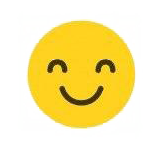

In [19]:
inp = input()
output(inp)

## IMDB Movie Reviews

In [ ]:
dataset = pd.read_excel("dataset.xlsx",  encoding='utf-8')

x = dataset.text
y = dataset.label

cv= CountVectorizer()
cv_train = cv.fit_transform(x.values.astype('U'))
cv_test = cv.transform(y.values.astype('U')).toarray()

x_train, x_test, y_train, y_test = train_test_split(cv_train, y, test_size=0.2, random_state=1)

In [ ]:
mlp_rashad = MLPClassifier(max_iter=100, alpha = 0.001, random_state=1, hidden_layer_sizes=(30,30,30))

mlp_rashad.fit(x_train, y_train)

In [ ]:
pred_mlp = mlp_rashad.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_mlp))

In [ ]:
inp = input()
inp = [inp]
inp_c = cv.transform(inp)
input_predict = mlp_rashad.predict(inp_c)
input_predict[0]

In [ ]:
dataset.label.value_counts().plot(kind='pie', autopct='%1.0f%%')

## Statistics

In [ ]:
merged_3 = pd.read_excel(r'C:\Users\ASUS\Desktop\new_merged_data 2.xlsx', encoding='utf-8')

x_3 = merged_3.Text
y_3 = merged_3.Sentiment

In [ ]:
stop_words = ["bu", "bir", "də","da","ki","və","nə","mən","kim","bunu","hər", 
              "üçün","ya","foto","siz","özünü","VİDEO","Video","kimi","biz","Adam","niyə",
              "adam","video","deo","vi","ilə","ən","qədər","elə","məni","sən","de","ve","mənə"]
x_m3_cv= CountVectorizer(stop_words = stop_words)
x_m3_cv_train = x_m3_cv.fit_transform(x_3.values.astype('U'))
x_m3_cv_test = x_m3_cv.transform(y_3.values.astype('U')).toarray()

In [ ]:
x_train_m3, x_test_m3, y_train_m3, y_test_m3 = train_test_split(x_m3_cv_train, y_3, test_size=0.2, random_state=1)


In [ ]:
len(x_m3_cv.get_feature_names())

In [ ]:
matrix = x_m3_cv.fit_transform(x_3.values.astype('U'))
freqs = zip(x_m3_cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print (sorted(freqs, key=lambda x: -x[1]))

In [ ]:
neg_doc_matrix = x_m3_cv.transform((merged_3[merged_3.Sentiment == "negative"].Text).values.astype('U'))
pos_doc_matrix = x_m3_cv.transform((merged_3[merged_3.Sentiment == 'positive'].Text).values.astype('U'))
neut_doc_matrix = x_m3_cv.transform((merged_3[merged_3.Sentiment == 'neutral'].Text).values.astype('U'))
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neut_tf = np.sum(neut_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
neut = np.squeeze(np.asarray(neut_tf))
term_freq_df = pd.DataFrame([neg,pos,neut],columns=x_m3_cv.get_feature_names()).transpose()

In [ ]:
term_freq_df.columns = ['negative', 'positive','neutral']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']+term_freq_df['neutral']
term_freq_df.sort_values(by='total', ascending=False).iloc[:20]

In [ ]:
neg_tweets = merged_3[merged_3.Sentiment == 'negative']
neg_string = []
for t in neg_tweets.Text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

In [ ]:
from PIL import Image
mask = np.array(Image.open("/Users/ASUS/Desktop/AZE.png"))

In [ ]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
wordcloud_neg = WordCloud(background_color="white",font_path='/Users/ASUS/Desktop/9991.ttf',width=1200, height=600,max_font_size=200, stopwords= stop_words,mask=mask).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_neg.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [ ]:
pos_tweets = merged_3[merged_3.Sentiment == 'positive']
pos_string = []
for t in pos_tweets.Text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

In [ ]:
wordcloud_pos = WordCloud(background_color="white",font_path='/Users/ASUS/Desktop/9991.ttf',width=1200, height=600,max_font_size=200,colormap='magma',stopwords= stop_words,mask=mask).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_pos.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("/Users/ASUS/Desktop/flag.png", format="png")

In [26]:
merged_3.Text = merged_3.Text.fillna(value="Salam")

In [27]:
# number of words
res = 0
for index, row in merged_3.iterrows(): 
    res += len(merged_3['Text'][index].split())

In [29]:
res

116293

In [31]:
# unique
for index, row in merged_3.iterrows(): 
    text= merged_3['Text'][index].split()
    rset1= set(text)
    result+= len(rset1)

In [32]:
result

113193

## Graphs

In [190]:
import matplotlib.pyplot as plt 

In [98]:
language = new_data['Language.1']

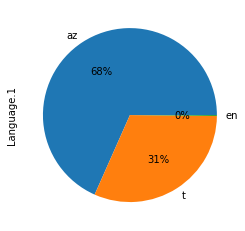

In [101]:
new_data['Language.1'].value_counts().plot(kind='pie', autopct='%1.0f%%')

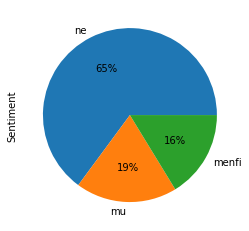

In [107]:
data_f['Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

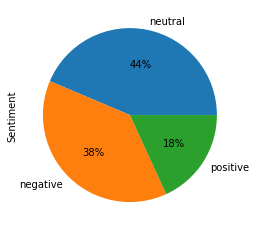

In [3]:
merged_3.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [109]:
new_data.head()

,Full Text,Sentiment,Language.1
0,RT @seyidov717: Çok konuşdum anlamadılar bende...,ne,t
1,@atayaliko @veliefendideat @istiklalAkarsu Val...,mu,t
2,Aaa gece gece Ali tweet attı noluyor acaba @at...,ne,t
3,Zamanı borç alalım biz gecelerden\nDuyup yaşam...,ne,t
4,@gunnersamir11 @HandofHenry Yo biz qoymuşuğğ b...,ne,az


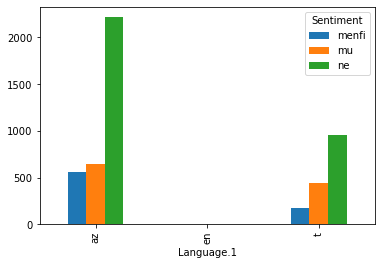

In [117]:
tweet_sentiment = new_data.groupby(['Language.1', 'Sentiment']).Sentiment.count().unstack()
tweet_sentiment.plot(kind='bar')